In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt

Q3

In [ ]:
# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]

# get y labels from the txt file
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]

# get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [ ]:
print('Train shape : ' + str(X_train.shape))
print('Test shape : ' + str(X_test.shape))
print('Validation shape : ' + str(X_val.shape))

Train shape : (7352, 561)
Test shape : (2062, 561)
Validation shape : (885, 561)


In [ ]:
y_train = y_train -1 

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [ ]:
y_test = y_test - 1 

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

**Q4**

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(units=10,activation='sigmoid'),
                                #  keras.layers.Dense(units =10, activation = 'sigmoid'),
                                 keras.layers.Dense(6, activation = 'softmax')
                              
                                ])

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=15)

Epoch 1/15
230/230 [==============================] - 1s 1ms/step - loss: 1.3008 - accuracy: 0.5155
Epoch 2/15
230/230 [==============================] - 0s 1ms/step - loss: 0.8698 - accuracy: 0.8043
Epoch 3/15
230/230 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.8862
Epoch 4/15
230/230 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.9151
Epoch 5/15
230/230 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.9274
Epoch 6/15
230/230 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.9373
Epoch 7/15
230/230 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.9465
Epoch 8/15
230/230 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9569
Epoch 9/15
230/230 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9603
Epoch 10/15
230/230 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.9626

In [ ]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=2)

65/65 - 0s - loss: 0.1965 - accuracy: 0.9355 - 323ms/epoch - 5ms/step


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

**Q5**

In [ ]:
class SOM:
    def __init__(self,data, map_size,dir_map="not load from file", lr = 0.2):

        self.map = np.random.random(size=(map_size[0], map_size[1], map_size[2]))
        self.lr0 = lr
        self.lr = self.lr0
        self.R0 = map_size[0]//2
        self.R = self.R0
        if dir_map != "not load from file":
          self.load_map(dir_map)
    
    def load_map(self,dir_map):
        with open(dir_map, "rb") as f:
            self.map = pickle.load(f)
        print("load map finished")

        
    def train(self, X, y, T=1000, error_threshold=10**-50):
        # Loss history
        Js = []
        for t in range(T):
            prev_map = self.map.copy()
            # Shuffle X in every iteration
            shuffle_ind = np.random.randint(0, X.shape[0], X.shape[0])
            for i in range(len(X)):
                x = X.iloc[i, :]
                # Neuron with most compatibilty with x
                winner = self.find_winner(x)
                # Get all neurons in the neighborhood of winner
                NS = self.get_NS(winner)
                # Update weights of all neurons in the neighborhood of winner
                self.update_weights(x, NS, len(X)) 

            # Update learning rate and neighborhood radius (linear decay)
            self.lr = self.lr0 * (1 - (t) / T)
            self.R = self.R0 * (1 - (t) / T)


            Js.append(np.linalg.norm(prev_map - self.map))

            if t%10 == 0 or t == T-1:
                print(f"Iteration: {t}, Loss: {Js[-1]:.4f}, lr: {self.lr:.4f}, R: {self.R:.4f}")
                self.visualize(X,y)

            if Js[-1] < error_threshold:
                print("MIN CHANGE")
                break

        return Js
            
    def find_winner(self, x):
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        dists = np.sum((self.map - rep_x) ** 2, axis=2)  

        winner = np.unravel_index(np.argmin(dists, axis=None), shape=dists.shape)
        return winner

    
    def get_NS(self, winner):
        # not neighbor = 0 , neighbor = 1/sqrt(euclidean_distance)
        NS = np.zeros(shape= (self.map.shape[0], self.map.shape[1]))
        iw, jw = winner[0], winner[1]
        R = int(self.R)
        for ri in range(-R, R):
            for rj in range(-R, R):
                if (0 <= iw + ri < self.map.shape[0]) and  (0 <= jw + rj < self.map.shape[1]):   
                    NS[iw + ri, jw + rj] = 0 if np.sqrt(ri**2 + rj**2) > R else 1/ ( 1+ np.sqrt(ri**2 + rj**2))  
        return NS
    
    def update_weights(self, x, n_strength, X_len):
        NS = np.tile(n_strength, [self.map.shape[2],1,1]).transpose()
        rep_x = np.tile(x, [self.map.shape[0], self.map.shape[1], 1])
        Delta = rep_x - self.map 
        self.map = self.map + (self.lr/X_len) * np.multiply(NS, Delta)

    def visualize(self, X, y):
        scores = np.zeros(shape=(self.map.shape[0], self.map.shape[1],len(list(set(y)))))  
        self.scores = np.zeros(shape=(self.map.shape[0], self.map.shape[1]))  
        for i in range(len(X)):
            x = X.iloc[i, :]
            x = np.asarray(x)
            winner = self.find_winner(x)
            iw, jw = winner[0], winner[1]
            scores[iw, jw][y[i]] += 1
        for i in range(len(scores)):
            for j in range(len(scores[0])):
              self.scores[i,j] = np.argmax(scores[i,j])
        print(self.scores)
        c = plt.imshow(self.scores, cmap='jet')
        plt.colorbar(c)
        for i in range(len(scores)):
          for j in range(len(scores[0])):
            plt.text(j,i, self.scores[i, j],ha="center", va="center", color="w")
        plt.title("Class of each Neurons")
        plt.show()



    def extract_feature(self, x): # here we give a data of n feature and take a matrix of size map as output (e.g, 9*9)
        x = np.asarray(x)
        rep_x = np.tile(x, [self.map.shape[0], self.map.shape[0], 1])
        dists = np.sum((self.map - rep_x)**2, axis=2)
        return 1/ (1 + dists)
    
    def compute_score(self, X, y):
      y_pred = []
      for x in X :
        index = self.find_winner(x)
        y_pred.append(self.scores[index[0],index[1]])
      return accuracy_score(y,y_pred)


Iteration: 0, Loss: 6.3972, lr: 0.2000, R: 4.0000
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0.]]


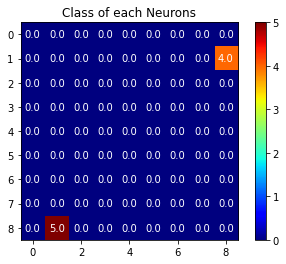

Iteration: 10, Loss: 3.4832, lr: 0.1967, R: 3.9333
[[0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 2. 0. 0. 0. 0. 0. 0.]]


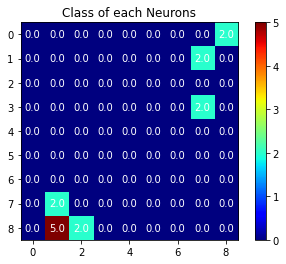

Iteration: 20, Loss: 2.2278, lr: 0.1933, R: 3.8667
[[0. 0. 0. 0. 0. 0. 0. 2. 2.]
 [0. 0. 0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 2. 0. 0. 0. 0. 0. 0.]
 [1. 5. 0. 0. 0. 0. 0. 0. 0.]]


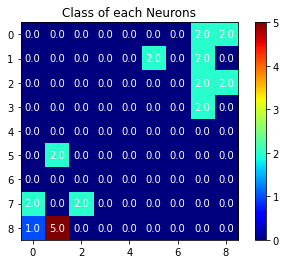

Iteration: 30, Loss: 1.4707, lr: 0.1900, R: 3.8000
[[0. 0. 0. 0. 0. 0. 2. 2. 2.]
 [0. 0. 0. 0. 0. 2. 2. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0.]]


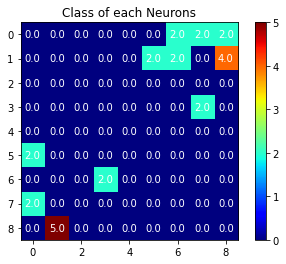

Iteration: 40, Loss: 1.0509, lr: 0.1867, R: 3.7333
[[0. 0. 0. 0. 0. 0. 2. 2. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0.]]


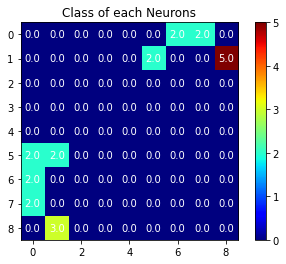

Iteration: 50, Loss: 0.8643, lr: 0.1833, R: 3.6667
[[0. 0. 0. 0. 0. 0. 2. 2. 1.]
 [0. 0. 0. 0. 0. 2. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 5. 0. 0. 0. 0. 0. 0. 0.]]


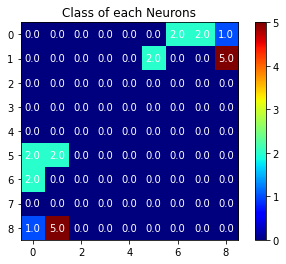

Iteration: 60, Loss: 0.8641, lr: 0.1800, R: 3.6000
[[0. 0. 0. 0. 0. 0. 2. 1. 1.]
 [0. 0. 0. 0. 0. 2. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 5. 5. 0. 0. 0. 0. 0. 0.]]


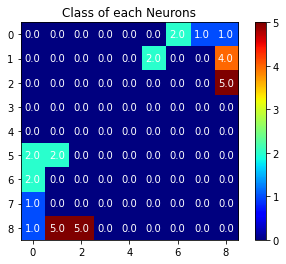

Iteration: 70, Loss: 0.8471, lr: 0.1767, R: 3.5333
[[0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 2. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 5. 5. 0. 0. 0. 0. 0. 0.]]


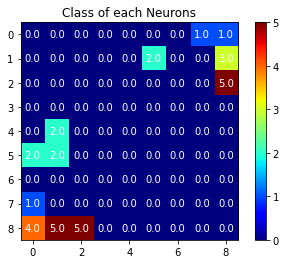

Iteration: 80, Loss: 0.7514, lr: 0.1733, R: 3.4667
[[0. 0. 0. 0. 0. 2. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 5. 5. 0. 0. 0. 0. 0. 0.]]


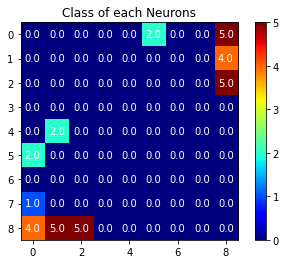

Iteration: 90, Loss: 0.6571, lr: 0.1700, R: 3.4000
[[0. 0. 0. 0. 2. 2. 0. 1. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [3. 5. 5. 0. 0. 0. 0. 0. 0.]]


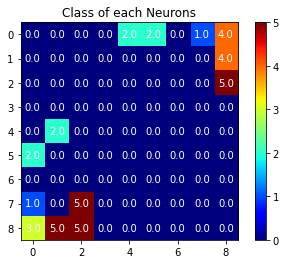

Iteration: 100, Loss: 0.6037, lr: 0.1667, R: 3.3333
[[0. 0. 0. 2. 2. 2. 0. 1. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 5. 5. 0. 0. 0. 0. 0. 0.]]


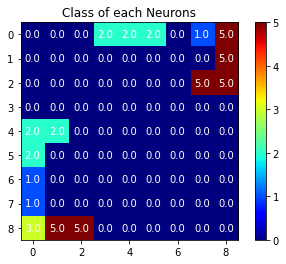

Iteration: 110, Loss: 0.5464, lr: 0.1633, R: 3.2667
[[0. 0. 0. 2. 2. 2. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 0. 0. 0. 0. 0. 0.]]


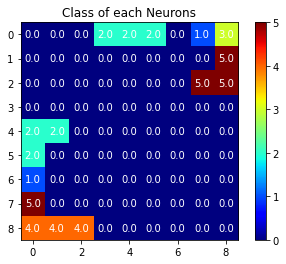

Iteration: 120, Loss: 0.5065, lr: 0.1600, R: 3.2000
[[0. 0. 0. 2. 2. 2. 0. 5. 3.]
 [0. 0. 0. 0. 2. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 5. 0. 0. 0. 0. 0.]]


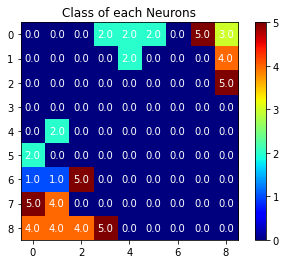

Iteration: 130, Loss: 0.7770, lr: 0.1567, R: 3.1333
[[0. 0. 0. 2. 2. 2. 1. 5. 5.]
 [0. 0. 0. 0. 2. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 4. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 5. 0. 0. 0. 0. 0.]]


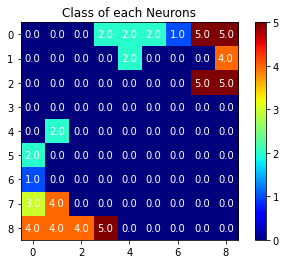

Iteration: 140, Loss: 0.8501, lr: 0.1533, R: 3.0667
[[0. 0. 0. 2. 2. 2. 1. 5. 5.]
 [0. 0. 0. 0. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [3. 4. 4. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 5. 0. 0. 0. 0. 0.]]


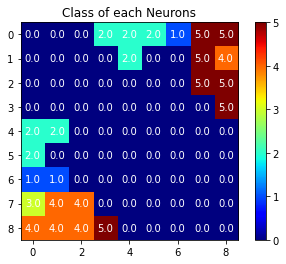

Iteration: 150, Loss: 0.8707, lr: 0.1500, R: 3.0000
[[0. 0. 0. 2. 2. 2. 1. 1. 5.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 2. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 4. 5. 0. 0. 0. 0. 0. 0.]
 [4. 4. 5. 3. 0. 0. 0. 0. 0.]]


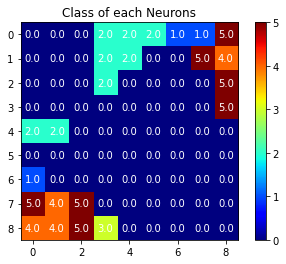

Iteration: 160, Loss: 0.4906, lr: 0.1467, R: 2.9333
[[0. 0. 0. 2. 2. 2. 1. 1. 5.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 2. 0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 4. 4. 0. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


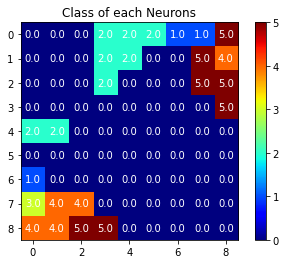

Iteration: 170, Loss: 0.4154, lr: 0.1433, R: 2.8667
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 2. 0. 0. 0. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


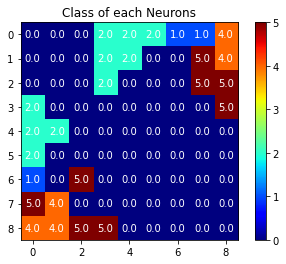

Iteration: 180, Loss: 0.3599, lr: 0.1400, R: 2.8000
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 0. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 4. 5. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


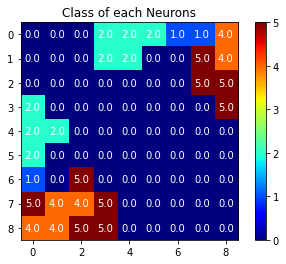

Iteration: 190, Loss: 0.3065, lr: 0.1367, R: 2.7333
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


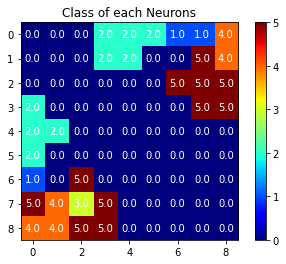

Iteration: 200, Loss: 0.2659, lr: 0.1333, R: 2.6667
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 4. 4.]
 [0. 0. 0. 0. 2. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


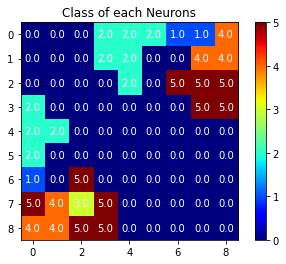

Iteration: 210, Loss: 0.2357, lr: 0.1300, R: 2.6000
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 4. 4.]
 [0. 0. 0. 0. 2. 0. 5. 5. 3.]
 [2. 0. 0. 0. 0. 0. 0. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 5. 5. 0. 0. 0. 0. 0.]]


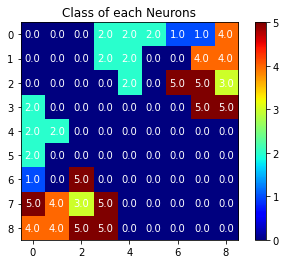

Iteration: 220, Loss: 0.2121, lr: 0.1267, R: 2.5333
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 3.]
 [2. 0. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


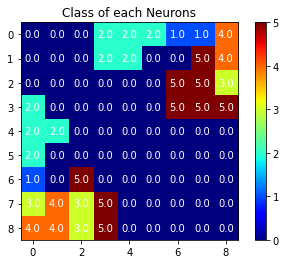

Iteration: 230, Loss: 0.1976, lr: 0.1233, R: 2.4667
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 0. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


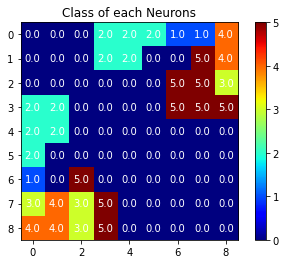

Iteration: 240, Loss: 0.1890, lr: 0.1200, R: 2.4000
[[0. 0. 0. 2. 2. 2. 1. 1. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


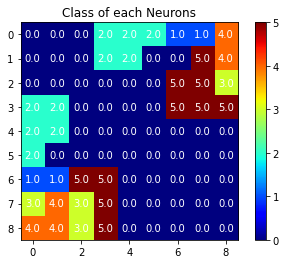

Iteration: 250, Loss: 0.1811, lr: 0.1167, R: 2.3333
[[0. 0. 0. 2. 2. 2. 1. 5. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


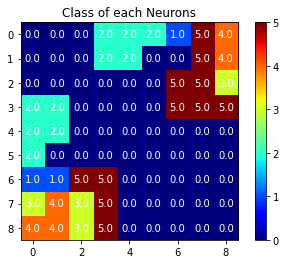

Iteration: 260, Loss: 0.1729, lr: 0.1133, R: 2.2667
[[0. 0. 0. 2. 2. 2. 1. 5. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 5. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


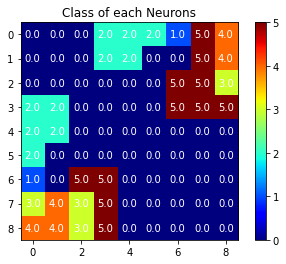

Iteration: 270, Loss: 0.1656, lr: 0.1100, R: 2.2000
[[0. 0. 0. 2. 2. 2. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 1. 5. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


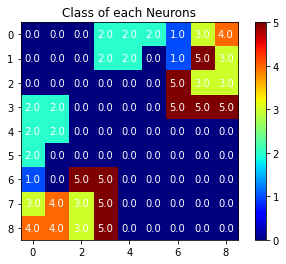

Iteration: 280, Loss: 0.1590, lr: 0.1067, R: 2.1333
[[0. 0. 0. 2. 2. 2. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


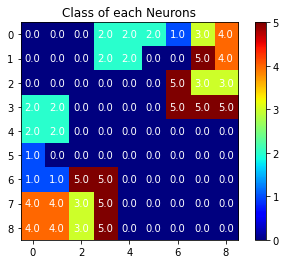

Iteration: 290, Loss: 0.1530, lr: 0.1033, R: 2.0667
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 0. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]]


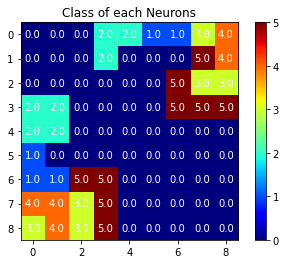

Iteration: 300, Loss: 0.1469, lr: 0.1000, R: 2.0000
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 1. 5. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]]


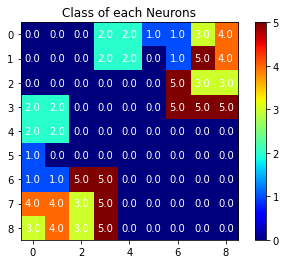

Iteration: 310, Loss: 0.0530, lr: 0.0967, R: 1.9333
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 1. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


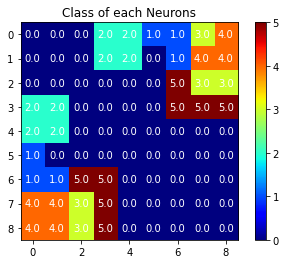

Iteration: 320, Loss: 0.0497, lr: 0.0933, R: 1.8667
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 1. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


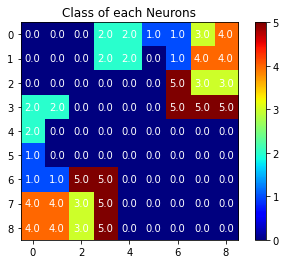

Iteration: 330, Loss: 0.0469, lr: 0.0900, R: 1.8000
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 2. 0. 1. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


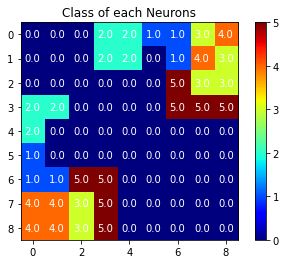

Iteration: 340, Loss: 0.0442, lr: 0.0867, R: 1.7333
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]
 [3. 4. 3. 5. 0. 0. 0. 0. 0.]]


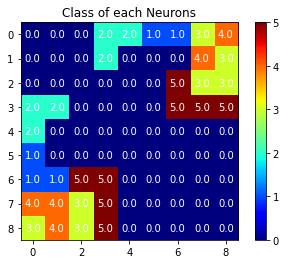

Iteration: 350, Loss: 0.0416, lr: 0.0833, R: 1.6667
[[0. 0. 0. 2. 2. 1. 1. 3. 4.]
 [0. 0. 0. 2. 0. 0. 1. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


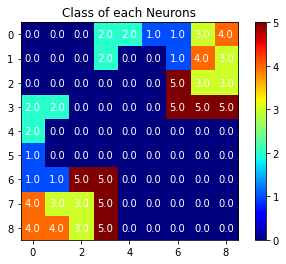

Iteration: 360, Loss: 0.0393, lr: 0.0800, R: 1.6000
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


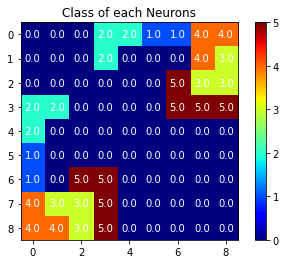

Iteration: 370, Loss: 0.0372, lr: 0.0767, R: 1.5333
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


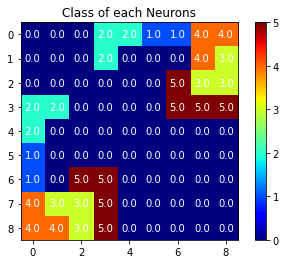

Iteration: 380, Loss: 0.0353, lr: 0.0733, R: 1.4667
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


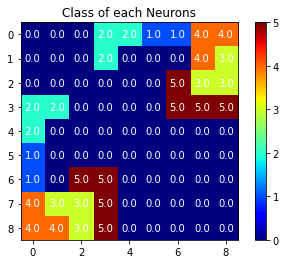

Iteration: 390, Loss: 0.0334, lr: 0.0700, R: 1.4000
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]]


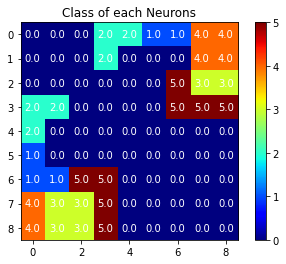

Iteration: 400, Loss: 0.0317, lr: 0.0667, R: 1.3333
[[0. 0. 0. 2. 2. 1. 1. 4. 3.]
 [0. 0. 0. 2. 0. 0. 0. 4. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


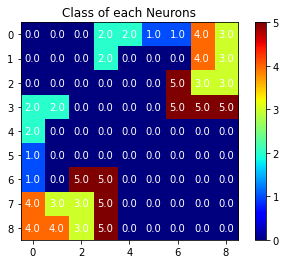

Iteration: 410, Loss: 0.0301, lr: 0.0633, R: 1.2667
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 3. 3.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 4. 3. 5. 0. 0. 0. 0. 0.]]


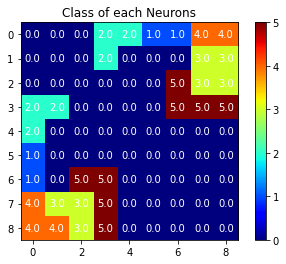

Iteration: 420, Loss: 0.0283, lr: 0.0600, R: 1.2000
[[0. 0. 0. 2. 2. 1. 1. 4. 3.]
 [0. 0. 0. 2. 0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]]


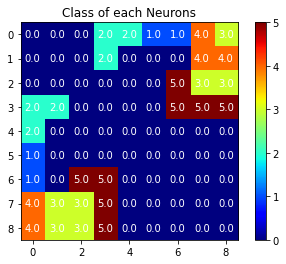

Iteration: 430, Loss: 0.0267, lr: 0.0567, R: 1.1333
[[0. 0. 0. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]]


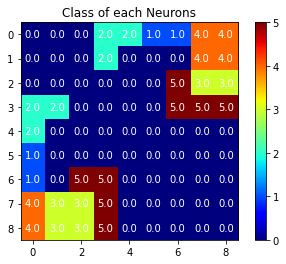

Iteration: 440, Loss: 0.0252, lr: 0.0533, R: 1.0667
[[0. 0. 2. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]]


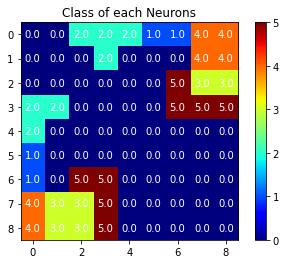

Iteration: 450, Loss: 0.0237, lr: 0.0500, R: 1.0000
[[0. 0. 2. 2. 2. 1. 1. 4. 4.]
 [0. 0. 0. 2. 0. 0. 0. 3. 4.]
 [0. 0. 0. 0. 0. 0. 5. 3. 3.]
 [2. 2. 0. 0. 0. 0. 5. 5. 5.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 5. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]
 [4. 3. 3. 5. 0. 0. 0. 0. 0.]]


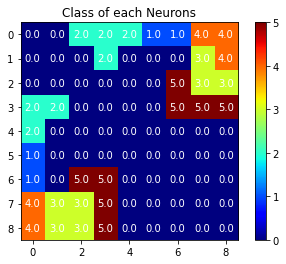

MIN CHANGE


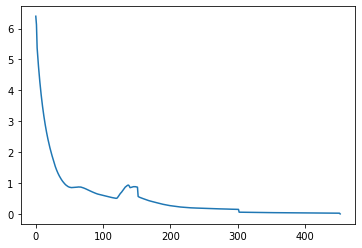

In [ ]:
m_size = 9
som_net = SOM(data = X_train ,map_size = [m_size,m_size,X_train.shape[1]])
Js = som_net.train(X_train, y_train , T = 600)
plt.plot(Js)
plt.show()